<a href="https://colab.research.google.com/github/pakpak123/LinearRegression/blob/main/Sleep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import lib
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import statsmodels.api as sm
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import combinations
import math 
warnings.filterwarnings('ignore')
sns.set()
import xlrd 
from openpyxl import load_workbook

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
wb = xlrd.open_workbook("/content/testnewtimesclae_1 (1).xlsx")
sheet1 = wb.sheet_by_index(0) 


In [ ]:
sheet1.cell_value (150,1)

1.0

In [ ]:

wb2 =load_workbook("/content/testnewtimesclae_1 (1).xlsx")
sheets = wb2.sheetnames 
Sheet1 = wb2[sheets[0]]
Sheet1.cell(row = 152 , column = 1).value = input("your amoumt time of sleep in hours :") 
# จำนวนชั่วโมงนอน


your amoumt time of sleep in hours :8


In [ ]:
print("06.00 = 0 , 05.00 = 1 , 04.00 = 2, 03.00 =3 ,02.00 = 4 ...")
Sheet1.cell(row = 152 , column = 2).value = input("your sleep time :") 
#เวลานอน

06.00 = 0 , 05.00 = 1 , 04.00 = 2, 03.00 =3 ,02.00 = 4 ...
your sleep time :4


In [ ]:
Sheet1.cell(row = 152 , column = 3).value = input("your nap time in hours :") 
#เวลานอนกลางวัน

your nap time in hours :0.5


In [ ]:

print(" dark = 8 , dimlight = 16 , bright = 24 ")
Sheet1.cell(row = 152 , column = 4).value = input("your light in bedroom :") 
Sheet1.cell(row = 152 , column = 5).value = "User_input" 
wb2.save(("/content/testnewtimesclae_1.xlsx"))

 dark = 8 , dimlight = 16 , bright = 24 
your light in bedroom :8


In [ ]:
df = pd.read_excel("/content/testnewtimesclae_1.xlsx")

In [ ]:
df.head()

,amount of sleeptime,sleeptime,nap-time,light,score
0,4,2.0,2.00,24,less
1,9,6.0,0.00,8,moderate
2,7,7.0,0.25,8,moderate
3,4,3.0,2.00,8,moderate
4,4,3.0,1.00,16,not_fresh_at_all


In [ ]:
df.tail()

,amount of sleeptime,sleeptime,nap-time,light,score
146,7,6.0,0.0,8,moderate
147,4,5.0,0.0,8,minimal
148,7,5.0,1.0,8,less
149,7,1.0,0.0,8,moderate
150,8,4.0,0.5,8,User_input


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
cols=['amount of sleeptime ', 'sleeptime', 'nap-time', 'light']

In [ ]:
X=df[cols]
scaler = StandardScaler()
X_t=scaler.fit_transform(X)

In [ ]:
dz=pd.DataFrame(X_t.round(4), columns=[f'z_{c}' for c in cols])


In [ ]:
dz.head()

,z_amount of sleeptime,z_sleeptime,z_nap-time,z_light
0,-1.7398,-1.8104,1.5084,3.9325
1,1.1408,0.5475,-0.8976,-0.4661
2,-0.0114,1.1370,-0.5969,-0.4661
3,-1.7398,-1.2209,1.5084,-0.4661
4,-1.7398,-1.2209,0.3054,1.7332


In [ ]:
dz.tail()

,z_amount of sleeptime,z_sleeptime,z_nap-time,z_light
146,-0.0114,0.5475,-0.8976,-0.4661
147,-1.7398,-0.0420,-0.8976,-0.4661
148,-0.0114,-0.0420,0.3054,-0.4661
149,-0.0114,-2.3999,-0.8976,-0.4661
150,0.5647,-0.6314,-0.2961,-0.4661


In [ ]:
pd.concat([df,dz],axis='columns').head()

,amount of sleeptime,sleeptime,nap-time,light,score,z_amount of sleeptime,z_sleeptime,z_nap-time,z_light
0,4,2.0,2.00,24,less,-1.7398,-1.8104,1.5084,3.9325
1,9,6.0,0.00,8,moderate,1.1408,0.5475,-0.8976,-0.4661
2,7,7.0,0.25,8,moderate,-0.0114,1.1370,-0.5969,-0.4661
3,4,3.0,2.00,8,moderate,-1.7398,-1.2209,1.5084,-0.4661
4,4,3.0,1.00,16,not_fresh_at_all,-1.7398,-1.2209,0.3054,1.7332


In [ ]:
pd.concat([df,dz],axis='columns').tail()

,amount of sleeptime,sleeptime,nap-time,light,score,z_amount of sleeptime,z_sleeptime,z_nap-time,z_light
146,7,6.0,0.0,8,moderate,-0.0114,0.5475,-0.8976,-0.4661
147,4,5.0,0.0,8,minimal,-1.7398,-0.0420,-0.8976,-0.4661
148,7,5.0,1.0,8,less,-0.0114,-0.0420,0.3054,-0.4661
149,7,1.0,0.0,8,moderate,-0.0114,-2.3999,-0.8976,-0.4661
150,8,4.0,0.5,8,User_input,0.5647,-0.6314,-0.2961,-0.4661


In [ ]:
dz.cov()

,z_amount of sleeptime,z_sleeptime,z_nap-time,z_light
z_amount of sleeptime,1.006660,0.317618,-0.098364,-0.241887
z_sleeptime,0.317618,1.006654,-0.187301,-0.052104
z_nap-time,-0.098364,-0.187301,1.006625,0.036397
z_light,-0.241887,-0.052104,0.036397,1.006677


In [ ]:
pca = PCA(n_components=3)
pca.fit_transform(X_t)[:5] 

array([[ 4.19625109e+00,  1.60301315e+00,  1.62226406e+00],
       [-1.53294891e+00,  1.45784973e-01, -2.68876179e-01],
       [-1.04285369e+00,  4.09988168e-01, -1.20100425e-01],
       [ 2.15375761e+00, -1.24404955e+00, -2.41243268e-01],
       [ 2.56672265e+00,  1.00590160e+00, -3.16859808e-03]])

In [ ]:
print(f"sum ratio = {np.sum(pca.explained_variance_ratio_)}")
#data - accuracy


sum ratio = 0.8449876791214126


In [ ]:
pca.explained_variance_

array([1.50682013, 1.02848467, 0.86717892])

In [ ]:
pca.components_ #as Eigenvector

array([[-0.62306182, -0.57284127,  0.3652754 ,  0.38758318],
       [-0.22316814,  0.32219048, -0.60800573,  0.6904479 ],
       [ 0.28475038,  0.45758571,  0.68871015,  0.48498543]])

In [ ]:
dd = pd.concat([pd.DataFrame(pca.transform(X_t),columns=[f"PC{n}" for n in range(1,pca.n_components_+1)]),df[["score"]]] ,axis = 'columns')
dd.head()

,PC1,PC2,PC3,score
0,4.196251,1.603013,1.622264,less
1,-1.532949,0.145785,-0.268876,moderate
2,-1.042854,0.409988,-0.120100,moderate
3,2.153758,-1.244050,-0.241243,moderate
4,2.566723,1.005902,-0.003169,not_fresh_at_all


In [ ]:
X_pca = pca.fit_transform(X_t)

In [ ]:
np.dot(X_t,pca.components_.T)[:5]

array([[ 4.19625109e+00,  1.60301315e+00,  1.62226406e+00],
       [-1.53294891e+00,  1.45784973e-01, -2.68876179e-01],
       [-1.04285369e+00,  4.09988168e-01, -1.20100425e-01],
       [ 2.15375761e+00, -1.24404955e+00, -2.41243268e-01],
       [ 2.56672265e+00,  1.00590160e+00, -3.16859808e-03]])

Text(0.5, 0, 'PC2 Label')

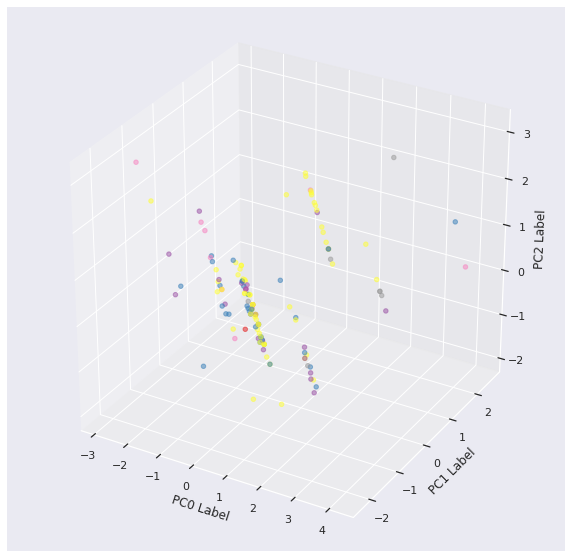

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
my_cmap = plt.get_cmap('hsv')
ax.scatter(X_pca[:,0] , X_pca[:,1], X_pca[:,2] ,alpha = .5 , cmap = "Set1" , c = df.score.astype("category").cat.codes)

ax.set_xlabel('PC0 Label')
ax.set_ylabel('PC1 Label')
ax.set_zlabel('PC2 Label')

In [ ]:
dd.to_csv("pca_result.csv",index = False)

K-means
ทำแกน 3 มิติ
กำหนดให้ชุดของข้อมูลมี 6 ตัว ไม่ใช้ Centroid ในการคิดแล้วเพราะไม่น่าเชื่อถือ + ลู่ผิดปกติ

In [ ]:
data = pd.read_csv('pca_result.csv')
data

x = data.iloc[:,0:3] # 1t for rows and second for columns
x

,PC1,PC2,PC3
0,4.196251,1.603013,1.622264
1,-1.532949,0.145785,-0.268876
2,-1.042854,0.409988,-0.120100
3,2.153758,-1.244050,-0.241243
4,2.566723,1.005902,-0.003169
...,...,...,...
146,-0.815035,0.402927,-0.596976
147,0.599515,0.598715,-1.358863
148,-0.037914,-0.518455,-0.038166
149,0.873361,-0.546699,-1.945667


In [ ]:
# since elbow occured at 5, hence the optimal number of clusters for the mall data is 5 
model = KMeans(n_clusters = 5, init = "k-means++", max_iter =500, n_init = 150, random_state = 0)
y_clusters = model.fit_predict(x)


predict ค่าจากข้อมูลท้้ง 3 แกน ผลลัพธ์ที่ได้เป็นระดับความสดชื่น

In [ ]:
# input matrix for segmentation
x = data[['PC1','PC2','PC3']].values

In [ ]:
kmeans = KMeans(6)
kmeans.fit(x)

KMeans(n_clusters=6)

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 5, 1, 4, 0, 1, 4, 1, 4, 1, 4, 1, 2, 1, 1, 5, 3, 3, 4, 1, 1, 1,
       1, 1, 4, 1, 2, 4, 2, 5, 1, 2, 5, 1, 2, 1, 2, 1, 1, 1, 1, 0, 3, 4,
       1, 1, 4, 5, 1, 1, 1, 5, 1, 5, 2, 1, 1, 5, 2, 2, 5, 5, 3, 0, 1, 1,
       1, 3, 1, 3, 1, 5, 3, 1, 3, 1, 1, 2, 2, 1, 5, 4, 3, 1, 2, 3, 2, 2,
       3, 3, 3, 4, 1, 1, 5, 1, 1, 2, 5, 0, 1, 1, 0, 5, 3, 3, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 1, 5, 5, 3, 5, 2, 2, 2, 1, 0, 1, 1, 1, 3, 1,
       5, 1, 2, 3, 1, 0, 1, 1, 1, 0, 4, 2, 4, 1, 1, 1, 1, 4, 1],
      dtype=int32)

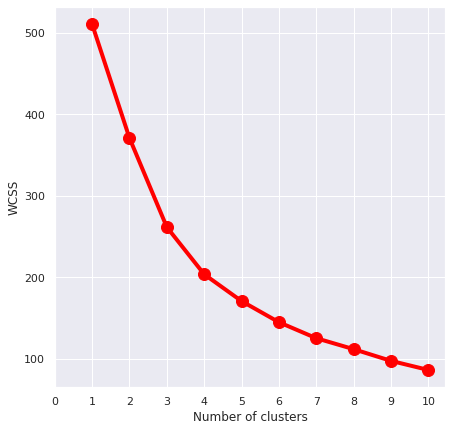

In [ ]:
# find the optimal number of clusters using elbow method  -- >This is for 3 features = [age,anual income,spending score]
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 6, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

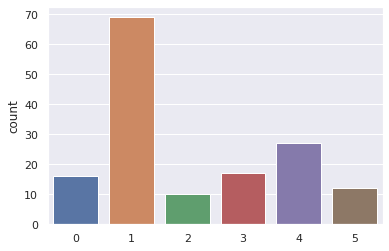

In [ ]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

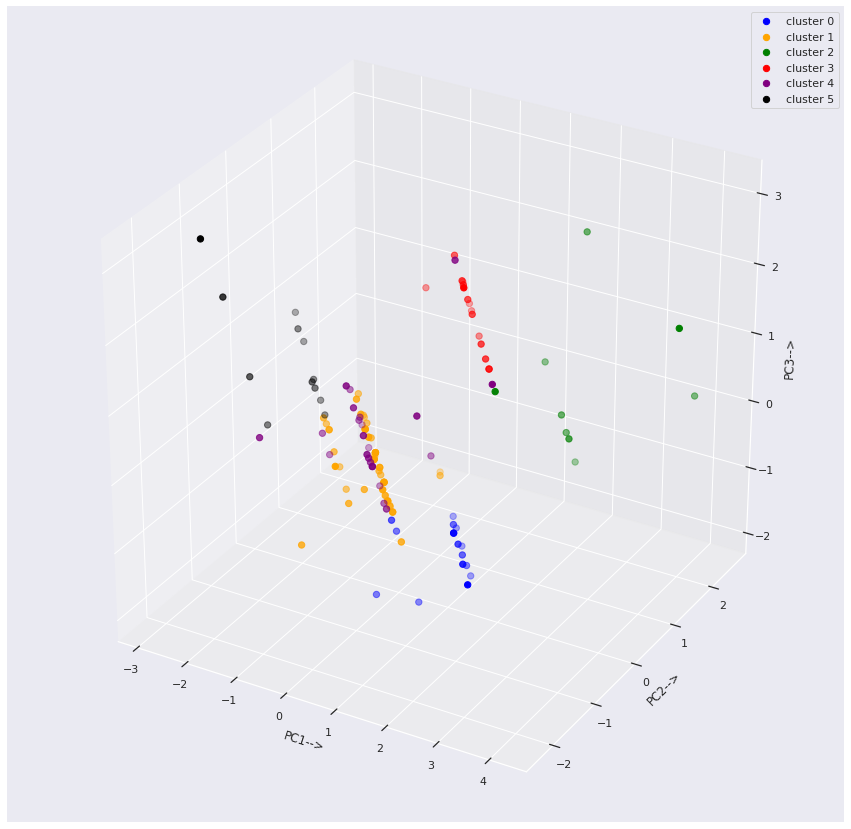

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = 'red', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(x[y_clusters == 5,0],x[y_clusters == 5,1],x[y_clusters == 5,2], s = 40 , color = 'black', label = "cluster 5")
ax.set_xlabel('PC1-->')
ax.set_ylabel('PC2-->')
ax.set_zlabel('PC3-->')
ax.legend()
plt.show()

## Euclidean and Manhatton Part ##


Predict Score : 1
Simurality 3.5125418344133856


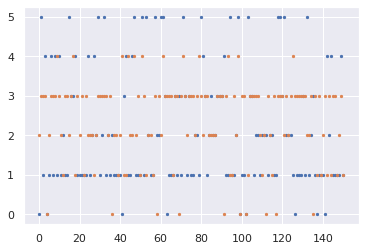

In [ ]:
import pandas
data_5 = []
for id_cl in range(150):
  if identified_clusters[id_cl] == 5:
    #print(id_cl)
    data_5.append(id_cl)


datatousewitheucliandman = pandas.read_excel('/content/testnewtimesclae_1.xlsx')
timerange = datatousewitheucliandman["amount of sleeptime "].tolist()
timetosleep = datatousewitheucliandman['sleeptime'].tolist()
naptime = datatousewitheucliandman['nap-time'].tolist()
lightning = datatousewitheucliandman['light'].tolist()
score = datatousewitheucliandman['score'].tolist()


for xscore in range(150):
  if score[xscore] == "not_fresh_at_all":
    score[xscore] = 0
  elif score[xscore] == "minimal":
    score[xscore] = 1
  elif score[xscore] == "less":
    score[xscore] = 2
  elif score[xscore] == "moderate":
    score[xscore] = 3
  elif score[xscore] == "much":
    score[xscore] = 4
  elif score[xscore] == "very much":
    score[xscore] = 5





dataEu_5 = []
for id_cl in range(150):
  if identified_clusters[id_cl] == 5:
    #print(id_cl)
    dataEu_5.append(id_cl)

dataEu_4 = []
for id_cl in range(150):
  if identified_clusters[id_cl] == 4:
    #print(id_cl)
    dataEu_4.append(id_cl)

dataEu_3 = []
for id_cl in range(150):
  if identified_clusters[id_cl] == 3:
    #print(id_cl)
    dataEu_3.append(id_cl)

dataEu_2 = []
for id_cl in range(150):
  if identified_clusters[id_cl] == 2:
    #print(id_cl)
    dataEu_2.append(id_cl)

dataEu_1 = []
for id_cl in range(150):
  if identified_clusters[id_cl] == 1:
    #print(id_cl)
    dataEu_1.append(id_cl)

dataEu_0 = []
for id_cl in range(150):
  if identified_clusters[id_cl] == 0:
    #print(id_cl)
    dataEu_0.append(id_cl)



sumtimerange = 0
sumtimetosleep = 0
sumnaptime = 0
sumlightning = 0

sumtimerange5 = 0
sumtimetosleep5 = 0
sumnaptime5 = 0
sumlightning5 = 0

sumtimerange4 = 0
sumtimetosleep4 = 0
sumnaptime4 = 0
sumlightning4 = 0

sumtimerange3 = 0
sumtimetosleep3 = 0
sumnaptime3 = 0
sumlightning3 = 0

sumtimerange2 = 0
sumtimetosleep2 = 0
sumnaptime2 = 0
sumlightning2 = 0

sumtimerange1 = 0
sumtimetosleep1 = 0
sumnaptime1 = 0
sumlightning1 = 0

sumtimerange0 = 0
sumtimetosleep0 = 0
sumnaptime0 = 0
sumlightning0 = 0

for elementofdata in data_5:
  sumtimerange += timerange[elementofdata]
  sumtimetosleep += timetosleep[elementofdata]
  sumnaptime += naptime[elementofdata]
  sumlightning += lightning[elementofdata]
  #print(elementofdata ,timerange[elementofdata], timetosleep[elementofdata], naptime[elementofdata], lightning[elementofdata])
meantimerange = sumtimerange / len(data_5)
meantimetosleep = sumtimetosleep / len(data_5)
meannaptime = sumnaptime / len(data_5)
meanlightning = sumlightning / len(data_5)

for elementofdata in dataEu_0:
  sumtimerange0 += timerange[elementofdata]
  sumtimetosleep0 += timetosleep[elementofdata]
  sumnaptime0 += naptime[elementofdata]
  sumlightning0 += lightning[elementofdata]
  #print(elementofdata ,timerange[elementofdata], timetosleep[elementofdata], naptime[elementofdata], lightning[elementofdata])
meantimerange0 = sumtimerange / len(dataEu_0)
meantimetosleep0 = sumtimetosleep / len(dataEu_0)
meannaptime0 = sumnaptime / len(dataEu_0)
meanlightning0 = sumlightning / len(dataEu_0)

for elementofdata in dataEu_5:
  sumtimerange5 += timerange[elementofdata]
  sumtimetosleep5 += timetosleep[elementofdata]
  sumnaptime5 += naptime[elementofdata]
  sumlightning5 += lightning[elementofdata]
  #print(elementofdata ,timerange[elementofdata], timetosleep[elementofdata], naptime[elementofdata], lightning[elementofdata])
try:
  meantimerange5 = sumtimerange / len(dataEu_5)
  meantimetosleep5 = sumtimetosleep / len(dataEu_5)
  meannaptime5 = sumnaptime / len(dataEu_5)
  meanlightning5 = sumlightning / len(dataEu_5)
except:
  meantimerange5 = 0
  meantimetosleep5 = 0
  meannaptime5 = 0
  meanlightning5 = 0
  print("No Data score 5")

for elementofdata in dataEu_4:
  sumtimerange4 += timerange[elementofdata]
  sumtimetosleep4 += timetosleep[elementofdata]
  sumnaptime4 += naptime[elementofdata]
  sumlightning4 += lightning[elementofdata]
  #print(elementofdata ,timerange[elementofdata], timetosleep[elementofdata], naptime[elementofdata], lightning[elementofdata])
meantimerange4 = sumtimerange / len(dataEu_4)
meantimetosleep4 = sumtimetosleep / len(dataEu_4)
meannaptime4 = sumnaptime / len(dataEu_4)
meanlightning4 = sumlightning / len(dataEu_4)

for elementofdata in dataEu_3:
  sumtimerange3 += timerange[elementofdata]
  sumtimetosleep3 += timetosleep[elementofdata]
  sumnaptime3 += naptime[elementofdata]
  sumlightning3 += lightning[elementofdata]
  #print(elementofdata ,timerange[elementofdata], timetosleep[elementofdata], naptime[elementofdata], lightning[elementofdata])
meantimerange3 = sumtimerange / len(dataEu_3)
meantimetosleep3 = sumtimetosleep / len(dataEu_3)
meannaptime3 = sumnaptime / len(dataEu_3)
meanlightning3 = sumlightning / len(dataEu_3)

for elementofdata in dataEu_2:
  sumtimerange2 += timerange[elementofdata]
  sumtimetosleep2 += timetosleep[elementofdata]
  sumnaptime2 += naptime[elementofdata]
  sumlightning2 += lightning[elementofdata]
  #print(elementofdata ,timerange[elementofdata], timetosleep[elementofdata], naptime[elementofdata], lightning[elementofdata])
meantimerange2 = sumtimerange / len(dataEu_2)
meantimetosleep2 = sumtimetosleep / len(dataEu_2)
meannaptime2 = sumnaptime / len(dataEu_2)
meanlightning2 = sumlightning / len(dataEu_2)

for elementofdata in dataEu_1:
  sumtimerange1 += timerange[elementofdata]
  sumtimetosleep1 += timetosleep[elementofdata]
  sumnaptime1 += naptime[elementofdata]
  sumlightning1 += lightning[elementofdata]
  #print(elementofdata ,timerange[elementofdata], timetosleep[elementofdata], naptime[elementofdata], lightning[elementofdata])
meantimerange1 = sumtimerange / len(dataEu_1)
meantimetosleep1 = sumtimetosleep / len(dataEu_1)
meannaptime1 = sumnaptime / len(dataEu_1)
meanlightning1 = sumlightning / len(dataEu_1)

def euclideanwithmean(x):
  distancewithmean = math.sqrt((x[0] - meantimerange) ** 2 + (x[1] - meantimetosleep) ** 2 + (x[2] - meannaptime) ** 2 + (x[3] - meanlightning) ** 2)
  return distancewithmean

def euclideanwithmean0(x):
  distancewithmean = math.sqrt((x[0] - meantimerange0) ** 2 + (x[1] - meantimetosleep0) ** 2 + (x[2] - meannaptime0) ** 2 + (x[3] - meanlightning0) ** 2)
  return distancewithmean

def euclideanwithmean1(x):
  distancewithmean = math.sqrt((x[0] - meantimerange1) ** 2 + (x[1] - meantimetosleep1) ** 2 + (x[2] - meannaptime1) ** 2 + (x[3] - meanlightning1) ** 2)
  return distancewithmean

def euclideanwithmean2(x):
  distancewithmean = math.sqrt((x[0] - meantimerange2) ** 2 + (x[1] - meantimetosleep2) ** 2 + (x[2] - meannaptime2) ** 2 + (x[3] - meanlightning2) ** 2)
  return distancewithmean

def euclideanwithmean3(x):
  distancewithmean = math.sqrt((x[0] - meantimerange3) ** 2 + (x[1] - meantimetosleep3) ** 2 + (x[2] - meannaptime3) ** 2 + (x[3] - meanlightning3) ** 2)
  return distancewithmean

def euclideanwithmean4(x):
  distancewithmean = math.sqrt((x[0] - meantimerange4) ** 2 + (x[1] - meantimetosleep4) ** 2 + (x[2] - meannaptime4) ** 2 + (x[3] - meanlightning4) ** 2)
  return distancewithmean

def euclideanwithmean5(x):
  distancewithmean = math.sqrt((x[0] - meantimerange5) ** 2 + (x[1] - meantimetosleep5) ** 2 + (x[2] - meannaptime5) ** 2 + (x[3] - meanlightning5) ** 2)
  return distancewithmean
#example input
ex_input = []
ex_input.append(timerange[150])
ex_input.append(timetosleep[150])
ex_input.append(naptime[150])
ex_input.append(lightning[150])
score[150] = identified_clusters[150]

print("Predict Score :", identified_clusters[150])
print("Simurality", euclideanwithmean(ex_input))
eucliscore = []
eucliscore.append(euclideanwithmean0(ex_input))
eucliscore.append(euclideanwithmean1(ex_input))
eucliscore.append(euclideanwithmean2(ex_input))
eucliscore.append(euclideanwithmean3(ex_input))
eucliscore.append(euclideanwithmean4(ex_input))
eucliscore.append(euclideanwithmean5(ex_input))
pseudoAxis = []
for x in range(151):
  pseudoAxis.append(x)
plt.scatter(pseudoAxis, identified_clusters, s = 5)
plt.scatter(pseudoAxis, score, s = 5)

Manhattan

In [ ]:


def manhattanmean_timerange(x):
  distancewithmean = (x[0] - meantimerange)
  return distancewithmean

def manhattanmean_naptime(x):
  distancewithmean = (x[2] - meannaptime)
  return distancewithmean

def manhattanmean_lightning(x):
  distancewithmean = (x[3] - meanlightning)
  return distancewithmean

def manhattanmean_timetosleep(x):
  distancewithmean = (x[1] - meantimetosleep)
  return distancewithmean

def manhattanmean_timetosleep_lightning(x):
  distancewithmean = (x[1] - meantimetosleep) + (x[3] - meanlightning)
  return distancewithmean

def manhattanmean_naptime_lightning(x):
  distancewithmean = (x[2] - meannaptime) + (x[3] - meanlightning)
  return distancewithmean

def manhattanwithmean(x):
  distancewithmean = (x[0] - meantimerange) + (x[1] - meantimetosleep) + (x[2] - meannaptime) + (x[3] - meanlightning)
  return distancewithmean



In [ ]:
print("k-mean predicted = ",identified_clusters[150])
print("=======================================================")
print("Predict Score :", identified_clusters[150])
print("Simurality", euclideanwithmean(ex_input))
#print(manhattanmean_timerange(ex_input), manhattanmean_timetosleep(ex_input), manhattanmean_naptime(ex_input), manhattanmean_lightning(ex_input))
if manhattanmean_timerange(ex_input) < 0:
  print("Your sleep duration is underate")
else:
  print("Your sleep duration is appropriate")
if manhattanmean_timetosleep(ex_input) < 0:
  print("Your sleep time is too late")
else:
  print("Your sleep time is appropriate")

k-mean predicted =  1
Predict Score : 1
Simurality 3.5125418344133856
Your sleep duration is underate
Your sleep time is too late
